# Graphical results

This notebook is used to display graphically the results that we obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We build the dataframe

We aggregate the different result tables

In [2]:
raw = pd.read_csv("csv_files/result1.csv", sep=';')

for i in range (2,11):
    name = 'csv_files/result'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])

for i in range (1,5):
    name = 'csv_files/result_double'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    
for i in range (1,8):
    name = 'csv_files/result_mem'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    
for i in range (1,7):
    name = 'csv_files/result_init'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    

raw = raw.sort_values('n').reset_index()

Some of the csv might include cases in which only GPU has been computed, we thus have to set the corresponding values for CPU to nan

In [3]:
def correct_df (x):
    if(x['time_CPU']==0):
        x['time_CPU']=np.nan
        x['loss_CPU']=np.nan
    if(x['time_GPU']==0):
        x['time_GPU']=np.nan
        x['loss_GPU']=np.nan
    if(x['time_CPU_double']==0):
        x['time_CPU_double']=np.nan
        x['loss_CPU_double']=np.nan
    if(x['time_GPU_mem']==0):
        x['time_GPU_mem']=np.nan
        x['loss_GPU_mem']=np.nan
    if(x['time_CPU_rand']==0):
        x['time_CPU_rand']=np.nan
        x['loss_CPU_rand']=np.nan
    return x

raw=raw.apply(correct_df, axis=1)
nb_measures = (raw['loss_CPU'].count()+raw['loss_CPU_double'].count()+raw['loss_GPU_mem'].count()
               +raw['loss_CPU_rand'].count()+raw['loss_GPU'].count())

In [4]:
raw.head()

,index,iter,loss_CPU,loss_CPU_double,loss_CPU_rand,loss_GPU,loss_GPU_mem,n,niter,time_CPU,time_CPU_double,time_CPU_rand,time_GPU,time_GPU_mem
0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,3.0,NaN,NaN,NaN,NaN,0.000305
1,1.0,1.0,0.000000,NaN,NaN,0.000000,NaN,1.0,3.0,0.000001,NaN,NaN,0.000463,NaN
2,0.0,0.0,0.000001,NaN,NaN,0.000001,NaN,1.0,3.0,0.001287,NaN,NaN,0.010709,NaN
3,0.0,0.0,NaN,NaN,0.000001,NaN,NaN,1.0,3.0,NaN,NaN,0.001839,NaN,NaN
4,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,3.0,NaN,NaN,NaN,NaN,0.000292


We group by n, we have to do it separately, otherwise, due to the NaN, ther would be holes in the graph.

In [5]:
df=raw
timeGPU=df[['time_GPU','n']].copy().dropna().groupby('n')
timeCPU=df[['time_CPU','n']].copy().dropna().groupby('n')
timeCPUd=df[['time_CPU_double','n']].copy().dropna().groupby('n')
timeGPUm=df[['time_GPU_mem','n']].copy().dropna().groupby('n')
timeCPUr=df[['time_CPU_rand','n']].copy().dropna().groupby('n')

lossGPU=df[['loss_GPU','n']].copy().dropna().groupby('n')
lossCPU=df[['loss_CPU','n']].copy().dropna().groupby('n')
lossCPUd=df[['loss_CPU_double','n']].copy().dropna().groupby('n')
lossGPUm=df[['loss_GPU_mem','n']].copy().dropna().groupby('n')
lossCPUr=df[['loss_CPU_rand','n']].copy().dropna().groupby('n')

In [34]:
np.mean(timeGPUm.mean().ix[:,0]/timeGPU.mean().ix[:,0])

/home/gauthier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


0.7945429383709782

### Analysis of running time

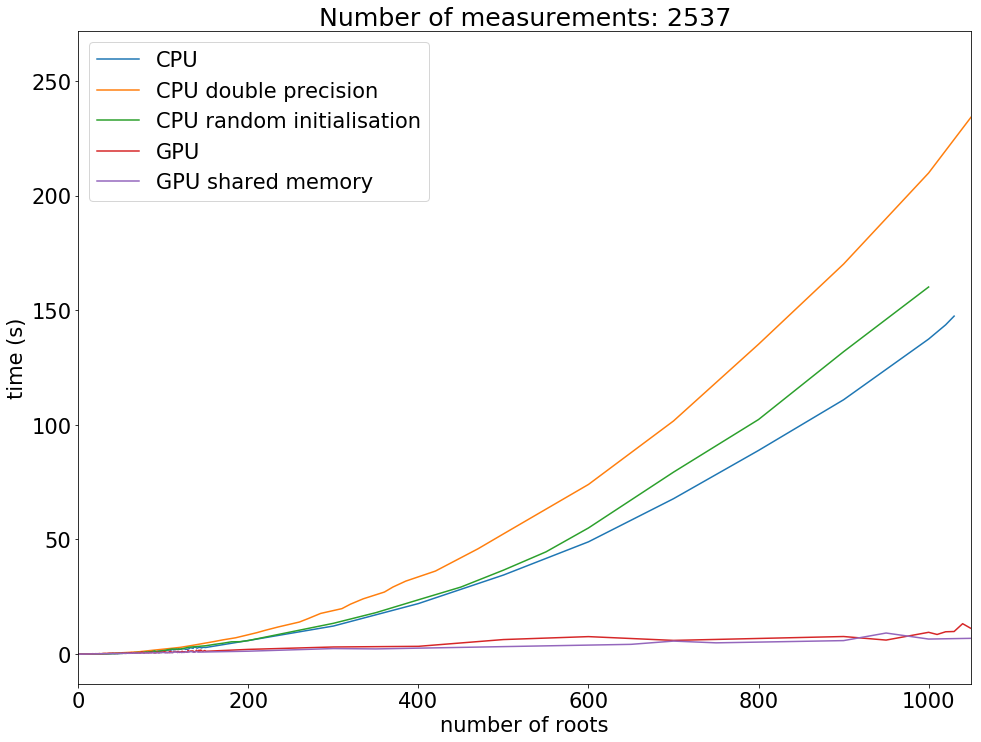

In [6]:
plt.figure(figsize=(16,12))
plt.rcParams.update({'font.size': 21})
plt.plot(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.plot(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double precision")
plt.plot(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random initialisation")
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU shared memory")
plt.legend()
plt.xlim(0,1050)
plt.title('Number of measurements: '+str(nb_measures))
plt.xlabel("number of roots")
plt.ylabel("time (s)")

plt.show()

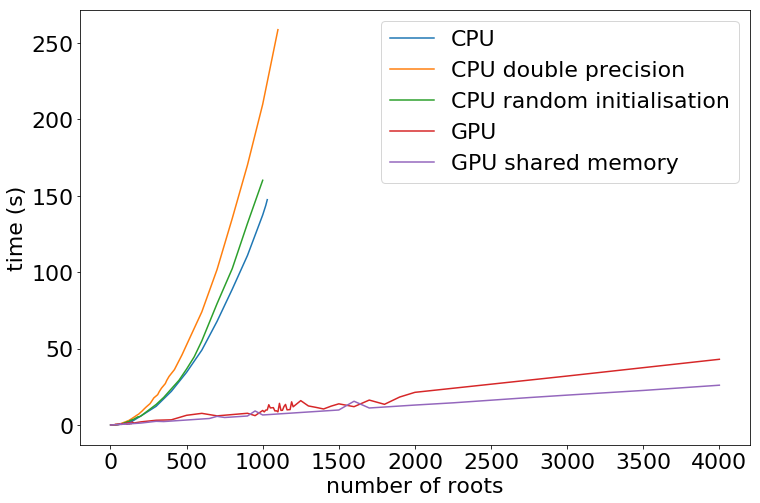

In [7]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.plot(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double precision")
plt.plot(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random initialisation")
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU shared memory")
plt.legend()
plt.xlabel("number of roots")
plt.ylabel("time (s)")

plt.show()

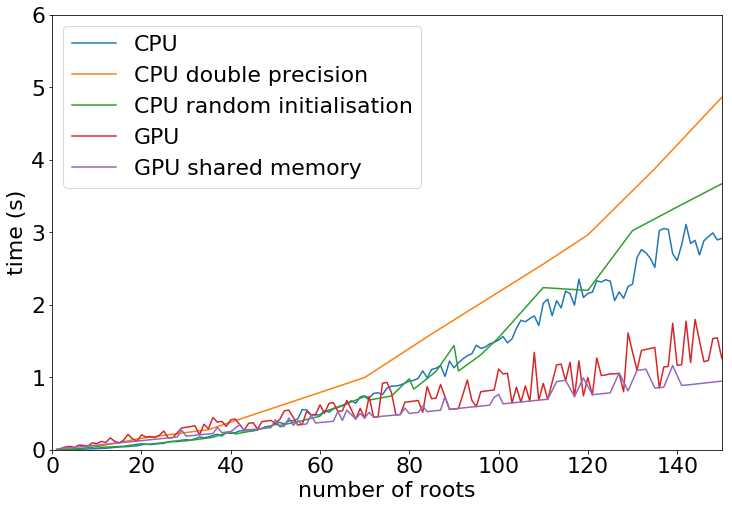

In [8]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.plot(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double precision")
plt.plot(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random initialisation")
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU shared memory")
plt.legend()
plt.xlim(0,150)
plt.ylim(0,6)
plt.xlabel("number of roots")
plt.ylabel("time (s)")

plt.show()

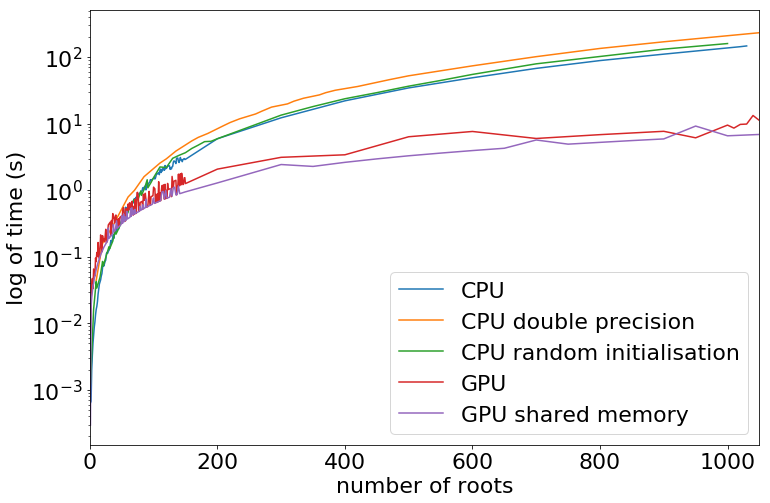

In [9]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.semilogy(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.semilogy(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double precision")
plt.semilogy(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random initialisation")
plt.semilogy(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.semilogy(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU shared memory")

plt.legend()
plt.xlim(0,1050)
plt.xlabel("number of roots")
plt.ylabel("log of time (s)")

plt.show()

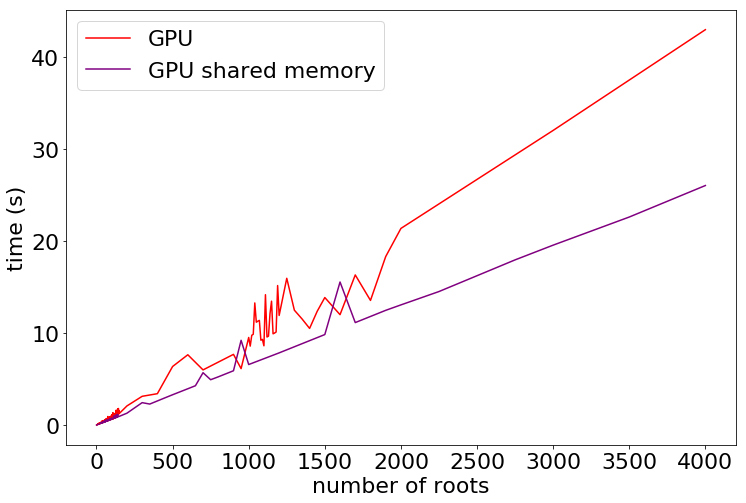

In [10]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU", color='red')
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU shared memory", color='purple')
plt.legend()
plt.xlabel("number of roots")
plt.ylabel("time (s)")

plt.show()

#### Analysis of spectral loss

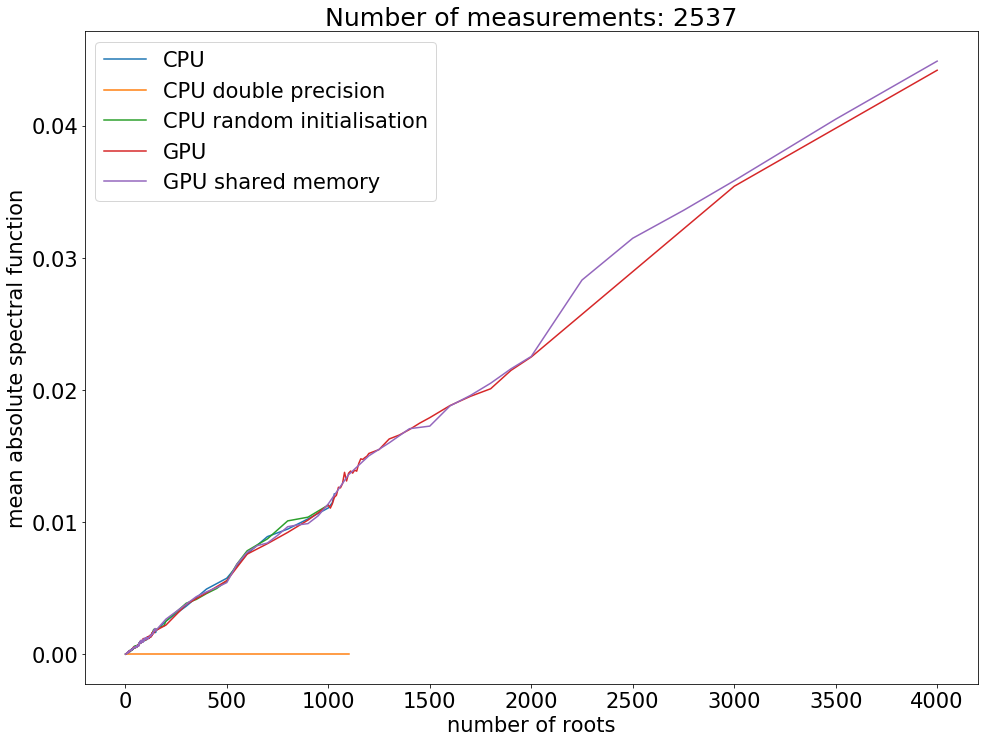

In [36]:
plt.figure(figsize=(16,12))
plt.rcParams.update({'font.size': 21})
plt.plot(lossCPU.mean().index,lossCPU['loss_CPU'].mean(), label="CPU")
plt.plot(lossCPUd.mean().index,lossCPUd['loss_CPU_double'].mean(), label="CPU double precision")
plt.plot(lossCPUr.mean().index,lossCPUr['loss_CPU_rand'].mean(), label="CPU random initialisation")
plt.plot(lossGPU.mean().index,lossGPU['loss_GPU'].mean(), label="GPU")
plt.plot(lossGPUm.mean().index,lossGPUm['loss_GPU_mem'].mean(), label="GPU shared memory")
plt.legend()
plt.xlabel("number of roots")
plt.ylabel("mean absolute spectral function")
plt.title('Number of measurements: '+str(nb_measures))

plt.show()